In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Palatino"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [351]:
wue_F=  pd.read_hdf("wue_F_merged.h5", "wue_F")
wue_F100 = wue_F[wue_F["Customers_N"] == 100]
wue_F100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
20,100,239403.0,44034.0,104.0,8.5,560,255.11,391.90,90.0,1297.01,3.92,2.55,3.45,5.6,12.97,4557.0,0.28,Wuerzburg,Fulfillment_Centre
21,100,214327.0,43512.0,103.0,8.5,560,248.09,376.59,67.5,1252.18,3.77,2.48,3.16,5.6,12.52,4379.0,0.29,Wuerzburg,Fulfillment_Centre
22,100,212442.0,43108.0,103.0,8.6,560,245.81,390.44,67.5,1263.75,3.90,2.46,3.13,5.6,12.64,4540.0,0.28,Wuerzburg,Fulfillment_Centre
23,100,203943.0,43469.0,103.0,8.5,560,246.01,407.38,67.5,1280.89,4.07,2.46,3.14,5.6,12.81,4737.0,0.27,Wuerzburg,Fulfillment_Centre
24,100,208490.0,43539.0,103.0,8.5,560,247.17,394.83,67.5,1269.50,3.95,2.47,3.15,5.6,12.70,4591.0,0.28,Wuerzburg,Fulfillment_Centre
25,100,205840.0,42688.0,103.0,8.7,560,242.59,405.06,67.5,1275.15,4.05,2.43,3.10,5.6,12.75,4710.0,0.27,Wuerzburg,Fulfillment_Centre
26,100,198211.0,43724.0,103.0,8.5,560,246.21,379.00,67.5,1252.71,3.79,2.46,3.14,5.6,12.53,4407.0,0.28,Wuerzburg,Fulfillment_Centre
27,100,229096.0,44204.0,104.0,8.5,560,254.08,370.75,90.0,1274.83,3.71,2.54,3.44,5.6,12.75,4311.0,0.30,Wuerzburg,Fulfillment_Centre
28,100,219447.0,43142.0,104.0,8.7,560,247.23,398.95,90.0,1296.18,3.99,2.47,3.37,5.6,12.96,4639.0,0.28,Wuerzburg,Fulfillment_Centre
29,100,223115.0,43732.0,104.0,8.6,560,250.73,386.14,90.0,1286.87,3.86,2.51,3.41,5.6,12.87,4490.0,0.29,Wuerzburg,Fulfillment_Centre


In [352]:
wue_D=  pd.read_hdf("wue_D_merged.h5", "wue_D")
wue_D100 = wue_D[wue_D["Customers_N"] == 100]
wue_D100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
20,100,197025.0,42184.0,103.000000,8.8,480.0,238.58,665.32,67.5,1451.40,6.65,2.39,3.06,4.8,14.51,4557.0,0.32,Wuerzburg,Darkstore
21,100,207631.0,44069.0,103.000000,8.4,480.0,249.56,639.33,67.5,1436.39,6.39,2.50,3.17,4.8,14.36,4379.0,0.33,Wuerzburg,Darkstore
22,100,204972.0,42511.0,102.999998,8.7,480.0,241.58,662.84,67.5,1451.92,6.63,2.42,3.09,4.8,14.52,4540.0,0.32,Wuerzburg,Darkstore
23,100,195724.0,42660.0,104.000000,8.8,480.0,240.64,691.60,90.0,1502.24,6.92,2.41,3.31,4.8,15.02,4737.0,0.32,Wuerzburg,Darkstore
24,100,231491.0,45191.0,104.000000,8.3,480.0,259.26,670.29,90.0,1499.55,6.70,2.59,3.49,4.8,15.00,4591.0,0.33,Wuerzburg,Darkstore
25,100,213050.0,43193.0,104.000000,8.7,480.0,246.32,687.66,90.0,1503.98,6.88,2.46,3.36,4.8,15.04,4710.0,0.32,Wuerzburg,Darkstore
26,100,193233.0,42553.0,103.000000,8.7,480.0,239.67,643.42,67.5,1430.59,6.43,2.40,3.07,4.8,14.31,4407.0,0.32,Wuerzburg,Darkstore
27,100,248809.0,47231.0,103.000000,7.9,480.0,272.21,629.41,67.5,1449.12,6.29,2.72,3.40,4.8,14.49,4311.0,0.34,Wuerzburg,Darkstore
28,100,218236.0,44409.0,103.000000,8.3,480.0,253.11,677.29,67.5,1477.90,6.77,2.53,3.21,4.8,14.78,4639.0,0.32,Wuerzburg,Darkstore
29,100,229353.0,46295.0,103.000000,8.0,480.0,264.19,655.54,67.5,1467.23,6.56,2.64,3.32,4.8,14.67,4490.0,0.33,Wuerzburg,Darkstore


In [353]:
wue_IS=  pd.read_hdf("wue_IS_merged.h5", "wue_IS")
wue_IS100 = wue_IS[wue_IS["Customers_N"] == 100]
wue_IS100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
20,100,151488.0,40183.0,103.0,9.2,480.0,220.75,1212.16,67.5,1980.41,12.12,2.21,2.88,4.8,19.80,4557.0,0.43,Wuerzburg,In_Store
21,100,155459.0,40481.0,103.0,9.2,480.0,222.90,1164.81,67.5,1935.21,11.65,2.23,2.90,4.8,19.35,4379.0,0.44,Wuerzburg,In_Store
22,100,158247.0,40461.0,103.0,9.2,480.0,223.30,1207.64,67.5,1978.44,12.08,2.23,2.91,4.8,19.78,4540.0,0.44,Wuerzburg,In_Store
23,100,148229.0,40572.0,103.0,9.1,480.0,222.03,1260.04,67.5,2029.57,12.60,2.22,2.90,4.8,20.30,4737.0,0.43,Wuerzburg,In_Store
24,100,165432.0,42106.0,103.0,8.8,480.0,232.52,1221.21,67.5,2001.23,12.21,2.33,3.00,4.8,20.01,4591.0,0.44,Wuerzburg,In_Store
25,100,146739.0,40315.0,103.0,9.2,480.0,220.53,1252.86,67.5,2020.89,12.53,2.21,2.88,4.8,20.21,4710.0,0.43,Wuerzburg,In_Store
26,100,164382.0,41628.0,103.0,8.9,480.0,230.03,1191.41,67.5,1968.94,11.91,2.30,2.98,4.8,19.69,4479.0,0.44,Wuerzburg,In_Store
27,100,161345.0,41199.0,103.0,9.0,480.0,227.41,1146.73,67.5,1921.64,11.47,2.27,2.95,4.8,19.22,4311.0,0.45,Wuerzburg,In_Store
28,100,148652.0,39887.0,103.0,9.3,480.0,218.82,1233.97,67.5,2000.29,12.34,2.19,2.86,4.8,20.00,4639.0,0.43,Wuerzburg,In_Store
29,100,145619.0,40546.0,103.0,9.1,480.0,221.44,1194.34,67.5,1963.28,11.94,2.21,2.89,4.8,19.63,4490.0,0.44,Wuerzburg,In_Store


In [354]:
df_list_w = [wue_IS100, wue_D100, wue_F100]
wue_100 = pd.concat(df_list_w, ignore_index=True)
wue_100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
0,100,151488.0,40183.0,103.000000,9.2,480.0,220.75,1212.16,67.5,1980.41,12.12,2.21,2.88,4.8,19.80,4557.0,0.43,Wuerzburg,In_Store
1,100,155459.0,40481.0,103.000000,9.2,480.0,222.90,1164.81,67.5,1935.21,11.65,2.23,2.90,4.8,19.35,4379.0,0.44,Wuerzburg,In_Store
2,100,158247.0,40461.0,103.000000,9.2,480.0,223.30,1207.64,67.5,1978.44,12.08,2.23,2.91,4.8,19.78,4540.0,0.44,Wuerzburg,In_Store
3,100,148229.0,40572.0,103.000000,9.1,480.0,222.03,1260.04,67.5,2029.57,12.60,2.22,2.90,4.8,20.30,4737.0,0.43,Wuerzburg,In_Store
4,100,165432.0,42106.0,103.000000,8.8,480.0,232.52,1221.21,67.5,2001.23,12.21,2.33,3.00,4.8,20.01,4591.0,0.44,Wuerzburg,In_Store
5,100,146739.0,40315.0,103.000000,9.2,480.0,220.53,1252.86,67.5,2020.89,12.53,2.21,2.88,4.8,20.21,4710.0,0.43,Wuerzburg,In_Store
6,100,164382.0,41628.0,103.000000,8.9,480.0,230.03,1191.41,67.5,1968.94,11.91,2.30,2.98,4.8,19.69,4479.0,0.44,Wuerzburg,In_Store
7,100,161345.0,41199.0,103.000000,9.0,480.0,227.41,1146.73,67.5,1921.64,11.47,2.27,2.95,4.8,19.22,4311.0,0.45,Wuerzburg,In_Store
8,100,148652.0,39887.0,103.000000,9.3,480.0,218.82,1233.97,67.5,2000.29,12.34,2.19,2.86,4.8,20.00,4639.0,0.43,Wuerzburg,In_Store
9,100,145619.0,40546.0,103.000000,9.1,480.0,221.44,1194.34,67.5,1963.28,11.94,2.21,2.89,4.8,19.63,4490.0,0.44,Wuerzburg,In_Store


In [355]:
list_wue100 = wue_100["Total_Cost_per_order"].tolist()
list_wue100= [list_wue100[x:x+10] for x in range(0, len(list_wue100), 10)]
list_wue100

[[19.8, 19.35, 19.78, 20.3, 20.01, 20.21, 19.69, 19.22, 20.0, 19.63],
 [14.51, 14.36, 14.52, 15.02, 15.0, 15.04, 14.31, 14.49, 14.78, 14.67],
 [12.97, 12.52, 12.64, 12.81, 12.7, 12.75, 12.53, 12.75, 12.96, 12.87]]

In [356]:
alb_F=  pd.read_hdf("alb_F_merged.h5", "alb_F")
alb_D=  pd.read_hdf("alb_D_merged.h5", "alb_D")
alb_IS=  pd.read_hdf("alb_IS_merged.h5", "alb_IS")
alb_F100 = alb_F[alb_F["Customers_N"] == 100]
alb_D100 = alb_D[alb_D["Customers_N"] == 100]
alb_IS100 = alb_IS[alb_IS["Customers_N"] == 100]
df_list_alb = [alb_IS100,alb_D100, alb_F100]
alb_100 = pd.concat(df_list_alb, ignore_index=True)
alb_100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
0,100,124502.00,36622.00,103.000000,10.1,480.000000,198.74,1212.16,67.500000,1958.40,12.12,1.99,2.66,4.8,19.58,4557.0,0.43,Albstadt,In_Store
1,100,115313.00,35092.00,103.000000,10.6,480.000000,189.73,1136.62,67.500000,1873.85,11.37,1.90,2.57,4.8,18.74,4273.0,0.44,Albstadt,In_Store
2,100,136959.00,37775.00,103.000000,9.8,480.000000,206.54,1207.64,67.500000,1961.68,12.08,2.07,2.74,4.8,19.62,4540.0,0.43,Albstadt,In_Store
3,100,133123.00,36680.00,103.000000,10.1,480.000000,200.57,1254.19,67.500000,2002.26,12.54,2.01,2.68,4.8,20.02,4715.0,0.42,Albstadt,In_Store
4,100,134043.00,36255.00,103.000000,10.2,480.000000,198.70,1221.21,67.500000,1967.41,12.21,1.99,2.66,4.8,19.67,4591.0,0.43,Albstadt,In_Store
5,100,144708.00,37287.00,103.000000,9.9,480.000000,205.59,1252.86,67.500000,2005.95,12.53,2.06,2.73,4.8,20.06,4710.0,0.43,Albstadt,In_Store
6,100,124952.00,35892.00,103.000000,10.3,480.000000,195.31,1191.41,67.500000,1934.22,11.91,1.95,2.63,4.8,19.34,4479.0,0.43,Albstadt,In_Store
7,100,120479.00,36144.00,103.000000,10.3,480.000000,195.72,1146.73,67.500000,1889.95,11.47,1.96,2.63,4.8,18.90,4311.0,0.44,Albstadt,In_Store
8,100,138986.00,38211.00,103.000000,9.7,480.000000,209.01,1233.97,67.500000,1990.48,12.34,2.09,2.77,4.8,19.90,4639.0,0.43,Albstadt,In_Store
9,100,143669.00,37957.00,103.000000,9.8,480.000000,208.62,1194.34,67.500000,1950.46,11.94,2.09,2.76,4.8,19.50,4490.0,0.43,Albstadt,In_Store


In [357]:
list_alb100 = alb_100["Total_Cost_per_order"].tolist()
list_alb100= [list_alb100[x:x+10] for x in range(0, len(list_alb100), 10)]
list_alb100

[[19.58, 18.74, 19.62, 20.02, 19.67, 20.06, 19.34, 18.9, 19.9, 19.5],
 [14.16, 13.92, 14.21, 14.54, 14.26, 14.46, 14.0, 13.89, 14.33, 14.19],
 [12.26, 12.16, 12.56, 12.82, 12.26, 12.74, 12.54, 12.53, 12.67, 12.33]]

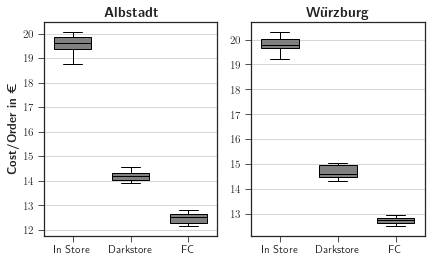

In [11]:
plt.style.use("seaborn-ticks")

#plt.rcParams.update({"ytick.labelsize" :12})
xticks = [1,2,3]
labels = ["In Store", "Darkstore", "FC"]
data1 = list_alb100[0]
data2 = list_alb100[1]
data3 = list_alb100[2]
data_alb = [data1, data2, data3]

dataw1 = list_wue100[0]
dataw2 = list_wue100[1]
dataw3 = list_wue100[2]
data_wue = [dataw1, dataw2, dataw3]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)


ax1.set_ylabel("\\textbf{Cost/Order in €}")
#ax.set_xlabel("\\textbf{Fulfillment Method}")
ax1.boxplot(data_alb, 
           patch_artist=True, widths=0.65,
           boxprops=dict(facecolor="grey", color="black"),
           medianprops=dict(color="black"))
ax1.set_xticks(xticks)
ax1.set_xticklabels(labels, rotation = 0)
#plt.yticks(fontsize = 11)
#ax2.yticks(fontsize=11)
loc =plticker.MultipleLocator(base=1)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)
#plt.ylim(ymin = 58, ymax = 104)

ax2.boxplot(data_wue, labels = ["In Store", "Darkstore", "FC"],
           patch_artist=True, widths = 0.65,
           boxprops=dict(facecolor="grey", color="black"),
           medianprops=dict(color="black"))

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
fig.tight_layout()
plt.show()
#fig.savefig("result_graph/base_scenario_boxplot.svg", format="svg")

In [13]:
def Average(lst):
    return sum(lst) / len(lst)

In [358]:
ISmean = Average(list_wue100[0])
Dmean =  Average(list_wue100[1])
Fmean =  Average(list_wue100[2])
ISmean

19.799

In [16]:
Dmean

14.669999999999996

In [17]:
Fmean

12.75

In [14]:
Average(list_wue100[0])

19.799

In [359]:
ISmean = Average(list_alb100[0])
Dmean =  Average(list_alb100[1])
Fmean =  Average(list_alb100[2])
ISmean

19.533

In [19]:
Dmean

14.196000000000002

In [20]:
Fmean

12.487

In [77]:
min(list_alb100[0])

18.74

In [78]:
max(list_alb100[0])

20.06

In [80]:
min(list_wue100[0])

19.22

In [81]:
max(list_wue100[0])

20.3

In [360]:
wue_avg = wue_100.groupby(np.arange(len(wue_100))//10).mean()
wue_avg

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item
0,100.0,154559.2,40737.8,103.0,9.10,480.0,223.973,1208.517,67.50,1979.990,12.085,2.240,2.915,4.8,19.799,4543.3,0.437
1,100.0,213952.4,44029.6,103.3,8.46,480.0,250.512,662.270,74.25,1467.032,6.622,2.506,3.248,4.8,14.670,4536.1,0.325
2,100.0,215431.4,43515.2,103.4,8.56,560.0,248.303,390.104,76.50,1274.907,3.901,2.483,3.249,5.6,12.750,4536.1,0.282


In [361]:
wue_sub = wue_avg[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V"]]
wue_sub["Facility"] = ["In Store", "Darkstore", "FC"]
wue_sub

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Facility
0,4.8,2.240,12.085,67.50,In Store
1,4.8,2.506,6.622,74.25,Darkstore
2,5.6,2.483,3.901,76.50,FC


In [362]:
wue_sub["Fixed_V"] = wue_sub["Fixed_V"]/100
wue_sub

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Facility
0,4.8,2.240,12.085,0.6750,In Store
1,4.8,2.506,6.622,0.7425,Darkstore
2,5.6,2.483,3.901,0.7650,FC


In [363]:
wue_sub["Total"] = wue_sub["Fixed_V"] + wue_sub["Trans_per_order"] + wue_sub["Var_per_order"] + wue_sub["FixedDC_per_order"]
wue_sub

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Facility,Total
0,4.8,2.240,12.085,0.6750,In Store,19.8000
1,4.8,2.506,6.622,0.7425,Darkstore,14.6705
2,5.6,2.483,3.901,0.7650,FC,12.7490


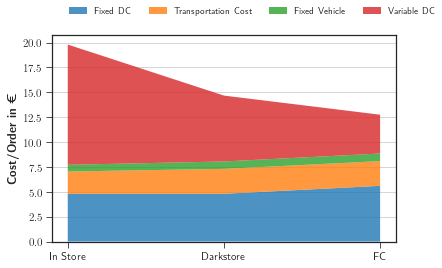

In [24]:
xticks = [1,2,3]
labels = ["In Store", "Darkstore", "FC"]
plt.style.use("seaborn-ticks")
fig, ax = plt.subplots(1,1, figsize=set_size(445))

ax.stackplot(wue_sub["Facility"], wue_sub["FixedDC_per_order"], 
             wue_sub["Trans_per_order"],
             wue_sub["Fixed_V"],
             wue_sub["Var_per_order"], 
             labels = ["Fixed DC",  "Transportation Cost", "Fixed Vehicle","Variable DC"],
             alpha = 0.8)
ax.yaxis.grid(True)
ax.set_ylabel("\\textbf{Cost/Order in €")
#ax.set_xlabel("\\textbf{Demand Scenario}")
fig.legend(loc="upper right", fontsize=9, ncol =4)
plt.show()

In [364]:
alb_avg = alb_100.groupby(np.arange(len(alb_100))//10).mean()
alb_avg

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item
0,100.0,131673.400,36791.500,103.000000,10.08,480.0,200.853,1205.113,67.500000,1953.466,12.051,2.011,2.683,4.8,19.533,4530.5,0.431
1,100.0,150439.582,37959.296,102.999989,9.78,480.0,209.853,662.270,67.499991,1419.623,6.622,2.099,2.773,4.8,14.196,4536.1,0.314
2,100.0,165174.786,39006.297,103.599993,9.55,560.0,217.546,390.104,80.999992,1248.650,3.901,2.176,2.987,5.6,12.487,4536.1,0.275


In [365]:
alb_sub = alb_avg[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V"]]
alb_sub["Facility"] = ["In Store", "Darkstore", "FC"]
alb_sub["Fixed_V"] = alb_sub["Fixed_V"]/100
alb_sub["Total"] = alb_sub["Fixed_V"] + alb_sub["Trans_per_order"] + alb_sub["Var_per_order"] + alb_sub["FixedDC_per_order"]
alb_sub

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Facility,Total
0,4.8,2.011,12.051,0.675,In Store,19.537
1,4.8,2.099,6.622,0.675,Darkstore,14.196
2,5.6,2.176,3.901,0.810,FC,12.487


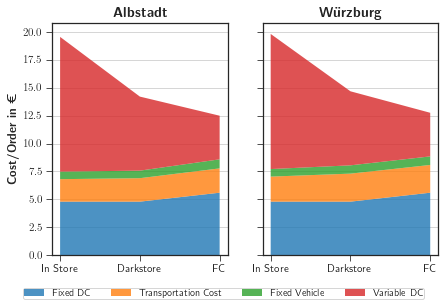

In [66]:
xticks = [1,2,3]
labels = ["In Store", "Darkstore", "FC"]
plt.style.use("seaborn-ticks")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(500), sharey=True)

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)


ax1.stackplot(alb_sub["Facility"], alb_sub["FixedDC_per_order"], 
             alb_sub["Trans_per_order"],
             alb_sub["Fixed_V"],
             alb_sub["Var_per_order"], 
             labels = ["Fixed DC",  "Transportation Cost", "Fixed Vehicle","Variable DC"],
             alpha = 0.8)


ax2.stackplot(wue_sub["Facility"], wue_sub["FixedDC_per_order"], 
             wue_sub["Trans_per_order"],
             wue_sub["Fixed_V"],
             wue_sub["Var_per_order"], 
             labels = ["Fixed DC",  "Transportation Cost", "Fixed Vehicle","Variable DC"],
             alpha = 0.8)
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax1.set_ylabel("\\textbf{Cost/Order in €")
#fig.supxlabel("\\textbf{Facility Type}", y = 0.00001, fontsize=12)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=True,
           fancybox=True, ncol=4, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)

plt.show()
fig.savefig("result_graph/base_cost_composition_area.svg", format="svg")

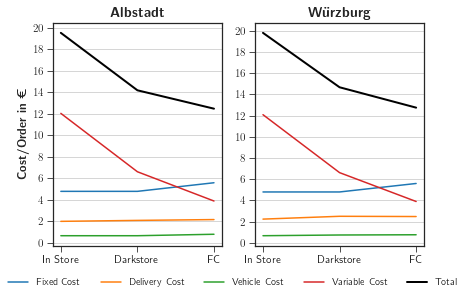

In [378]:
xticks = [1,2,3]
labels = ["In Store", "Darkstore", "FC"]
plt.style.use("seaborn-ticks")
fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(480))

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)


ax1.plot(alb_sub["Facility"], alb_sub["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(alb_sub["Facility"], alb_sub["Trans_per_order"], label="Delivery Cost")
ax1.plot(alb_sub["Facility"], alb_sub["Fixed_V"], label="Vehicle Cost")
ax1.plot(alb_sub["Facility"], alb_sub["Var_per_order"], label="Variable Cost")
ax1.plot(alb_sub["Facility"], alb_sub["Total"], color = "black", lw=2, label="Total")

ax2.plot(wue_sub["Facility"], wue_sub["FixedDC_per_order"])
ax2.plot(wue_sub["Facility"], wue_sub["Trans_per_order"])
ax2.plot(wue_sub["Facility"], wue_sub["Fixed_V"])
ax2.plot(wue_sub["Facility"], wue_sub["Var_per_order"])
ax2.plot(wue_sub["Facility"], wue_sub["Total"], color = "black", lw=2, label="Total")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax1.set_ylabel("\\textbf{Cost/Order in €")

loc =plticker.MultipleLocator(base=2)

ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)

#fig.supxlabel("\\textbf{Facility Type}", y = 0.00001, fontsize=12)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, labelspacing = -1, borderaxespad=0.1, borderpad=0.1)

plt.show()
fig.savefig("result_graph/base_cost_composition_line.svg", format="svg")

In [4]:
alb_F=  pd.read_hdf("alb_F_merged.h5", "alb_F")
alb_D=  pd.read_hdf("alb_D_merged.h5", "alb_D")
alb_IS=  pd.read_hdf("alb_IS_merged.h5", "alb_IS")

wue_F=  pd.read_hdf("wue_F_merged.h5", "wue_F")
wue_D=  pd.read_hdf("wue_D_merged.h5", "wue_D")
wue_IS=  pd.read_hdf("wue_IS_merged.h5", "wue_IS")

In [5]:
wue_F_list = wue_F["Total_Cost_per_order"].tolist()
wue_D_list = wue_D["Total_Cost_per_order"].tolist()
wue_IS_list = wue_IS["Total_Cost_per_order"].tolist()

alb_F_list = alb_F["Total_Cost_per_order"].tolist()
alb_D_list = alb_D["Total_Cost_per_order"].tolist()
alb_IS_list = alb_IS["Total_Cost_per_order"].tolist()

In [6]:
wue_F_list= [wue_F_list[x:x+10] for x in range(0, len(wue_F_list), 10)]
wue_D_list= [wue_D_list[x:x+10] for x in range(0, len(wue_D_list), 10)]
wue_IS_list= [wue_IS_list[x:x+10] for x in range(0, len(wue_IS_list), 10)]

alb_F_list= [alb_F_list[x:x+10] for x in range(0, len(alb_F_list), 10)]
alb_D_list= [alb_D_list[x:x+10] for x in range(0, len(alb_D_list), 10)]
alb_IS_list= [alb_IS_list[x:x+10] for x in range(0, len(alb_IS_list), 10)]

In [7]:
def Average(lst):
    return sum(lst) / len(lst)
wue_F_avg = list(map(Average, wue_F_list))
alb_F_avg =list(map(Average, alb_F_list))
wue_D_avg = list(map(Average, wue_D_list))
alb_D_avg = list(map(Average, alb_D_list))
wue_IS_avg = list(map(Average, wue_IS_list))
alb_IS_avg = list(map(Average, alb_IS_list))

In [10]:
x_ticks = [1,2,3,4]
x_base = x_ticks*3
x_base= [x_base[x:x+4] for x in range(0, len(x_base), 4)]
x_base

[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]

In [ ]:
wuef 45.51
wued 34.69
albf 46.8
albD 35
Favg = 46.2
Davg = 34.8

In [17]:
wue_F_avg

[30.714, 18.892, 12.75, 10.873]

In [18]:
wue_D_avg

[30.174, 20.059999999999995, 14.669999999999996, 13.029000000000002]

In [52]:
wue_IS_avg

[25.805999999999994, 20.395999999999997, 19.799, 19.948]

In [53]:
alb_IS_avg

[25.497, 20.091, 19.533, 19.832]

In [54]:
alb_D_avg

[29.742, 19.549999999999997, 14.196000000000002, 12.898000000000001]

In [55]:
alb_F_avg

[30.238000000000007, 18.429000000000002, 12.487, 10.55]

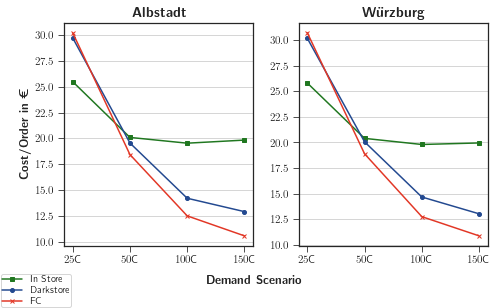

In [16]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]

wue_cost = [wue_IS_avg, wue_D_avg, wue_F_avg]

alb_cost = [alb_IS_avg, alb_D_avg, alb_F_avg]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=set_size(500))

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")

ax1.plot(labels,alb_IS_avg, marker = "s", ms=4, label="In Store", color="#207720")
ax1.plot(labels, alb_D_avg, marker = "o", ms=4, label = "Darkstore", color="#234990")
ax1.plot(labels, alb_F_avg, marker = "x", ms=4, label= "FC", color = "#E23726")
ax1.yaxis.grid(True)
ax2.plot(labels, wue_IS_avg, marker = "s", ms=4, color="#207720")
ax2.plot(labels, wue_D_avg, marker = "o", ms=4, color="#234990")
ax2.plot(labels, wue_F_avg, marker = "x", ms=4, color = "#E23726")
ax2.yaxis.grid(True)
#ax1.set_ylim(ymax = 32.5, ymin= 9.5)
#ax2.set_ylim(ymax=32.5, ymin=9.5)


loc =plticker.MultipleLocator(base=2.5)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=1, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
fig.savefig("result_graph/comp_methods_and_demand.svg", format = "svg")

In [19]:
wue_F

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario
0,25,75320.00,13611.00,26.000000,6.9,560,79.10,99.16,22.500000,760.76,3.97,3.16,4.06,22.40,30.43,1153.0,0.66,Wuerzburg,Fulfillment_Centre
1,25,94867.00,16272.00,26.000000,5.8,560,95.43,94.94,22.500000,772.87,3.80,3.82,4.72,22.40,30.91,1104.0,0.70,Wuerzburg,Fulfillment_Centre
2,25,92854.00,15226.00,26.000000,6.1,560,90.02,93.40,22.500000,765.92,3.74,3.60,4.50,22.40,30.64,1086.0,0.71,Wuerzburg,Fulfillment_Centre
3,25,96497.00,14937.00,26.000000,6.3,560,89.29,111.11,22.500000,782.90,4.44,3.57,4.47,22.40,31.32,1292.0,0.61,Wuerzburg,Fulfillment_Centre
4,25,92800.00,14851.00,26.000000,6.3,560,88.21,96.41,22.500000,767.12,3.86,3.53,4.43,22.40,30.68,1121.0,0.68,Wuerzburg,Fulfillment_Centre
5,25,77790.00,13366.00,26.000000,7.0,560,78.36,95.20,22.500000,756.06,3.81,3.13,4.03,22.40,30.24,1107.0,0.68,Wuerzburg,Fulfillment_Centre
6,25,95936.00,15298.00,26.000000,6.1,560,90.93,97.09,22.500000,770.52,3.88,3.64,4.54,22.40,30.82,1129.0,0.68,Wuerzburg,Fulfillment_Centre
7,25,93214.00,14807.00,26.000000,6.3,560,88.08,91.68,22.500000,762.26,3.67,3.52,4.42,22.40,30.49,1066.0,0.72,Wuerzburg,Fulfillment_Centre
8,25,81493.00,13662.00,26.000000,6.9,560,80.45,109.31,22.500000,772.26,4.37,3.22,4.12,22.40,30.89,1271.0,0.61,Wuerzburg,Fulfillment_Centre
9,25,77908.00,13326.00,26.000000,7.0,560,78.18,107.24,22.500000,767.92,4.29,3.13,4.03,22.40,30.72,1247.0,0.62,Wuerzburg,Fulfillment_Centre


In [20]:
wue_split = wue_F.groupby(np.arange(len(wue_F))//10).mean()
wue_split

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item
0,25.0,87867.90,14535.600,26.000000,6.47,560.0,85.805,99.554,22.500000,767.859,3.983,3.432,4.332,22.40,30.714,1157.6,0.667
1,50.0,133601.88,24749.699,51.999997,7.56,560.0,143.216,196.382,44.999979,944.598,3.927,2.865,3.765,11.20,18.892,2283.5,0.415
2,100.0,215431.40,43515.200,103.400000,8.56,560.0,248.303,390.104,76.500000,1274.907,3.901,2.483,3.249,5.60,12.750,4536.1,0.282
3,150.0,320964.40,64872.300,155.000000,8.62,560.0,370.135,588.197,112.500000,1630.832,3.920,2.466,3.217,3.73,10.873,6839.5,0.238


In [24]:
wue_dem = wue_split[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
#wue_dem["Facility"] = ["In Store", "Darkstore", "FC"]
wue_dem["Fixed_V"] = wue_dem["Fixed_V"]/100
wue_dem["Total"] = wue_dem["Fixed_V"] + wue_dem["Trans_per_order"] + wue_dem["Var_per_order"] + wue_dem["FixedDC_per_order"]
wue_F_scen = wue_dem
wue_F_scen

C:\Users\michi\AppData\Local\Temp/ipykernel_14488/4012246945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wue_dem["Fixed_V"] = wue_dem["Fixed_V"]/100
C:\Users\michi\AppData\Local\Temp/ipykernel_14488/4012246945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wue_dem["Total"] = wue_dem["Fixed_V"] + wue_dem["Trans_per_order"] + wue_dem["Var_per_order"] + wue_dem["FixedDC_per_order"]


,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,22.40,3.432,3.983,0.225,25.0,30.040
1,11.20,2.865,3.927,0.450,50.0,18.442
2,5.60,2.483,3.901,0.765,100.0,12.749
3,3.73,2.466,3.920,1.125,150.0,11.241


In [25]:
alb_split = alb_F.groupby(np.arange(len(alb_F))//10).mean()
alb_split

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,Var_per_order,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item
0,25.0,70367.290,12711.399,25.999999,7.38,560.0,73.872,99.554,22.499985,755.926,3.983,2.954,3.854,22.40,30.238,1157.6,0.656
1,50.0,97166.388,21306.698,51.999995,8.81,560.0,120.080,196.382,44.999992,921.462,3.927,2.402,3.302,11.20,18.429,2283.5,0.404
2,100.0,165174.786,39006.297,103.599993,9.55,560.0,217.546,390.104,80.999992,1248.650,3.901,2.176,2.987,5.60,12.487,4536.1,0.275
3,150.0,244017.200,58128.700,154.900000,9.61,560.0,323.812,588.197,110.250000,1582.259,3.920,2.158,2.893,3.73,10.550,6839.5,0.230


In [27]:
alb_dem = alb_split[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
#wue_dem["Facility"] = ["In Store", "Darkstore", "FC"]
alb_dem["Fixed_V"] = alb_dem["Fixed_V"]/100
alb_dem["Total"] = alb_dem["Fixed_V"] + alb_dem["Trans_per_order"] + alb_dem["Var_per_order"] + alb_dem["FixedDC_per_order"]
alb_F_scen =alb_dem
alb_F_scen

C:\Users\michi\AppData\Local\Temp/ipykernel_14488/1405371142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_dem["Fixed_V"] = alb_dem["Fixed_V"]/100
C:\Users\michi\AppData\Local\Temp/ipykernel_14488/1405371142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_dem["Total"] = alb_dem["Fixed_V"] + alb_dem["Trans_per_order"] + alb_dem["Var_per_order"] + alb_dem["FixedDC_per_order"]


,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,22.40,2.954,3.983,0.2250,25.0,29.5620
1,11.20,2.402,3.927,0.4500,50.0,17.9790
2,5.60,2.176,3.901,0.8100,100.0,12.4870
3,3.73,2.158,3.920,1.1025,150.0,10.9105


In [29]:
join_F = pd.concat([alb_F_scen, wue_F_scen])
join_F

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,22.40,2.954,3.983,0.2250,25.0,29.5620
1,11.20,2.402,3.927,0.4500,50.0,17.9790
2,5.60,2.176,3.901,0.8100,100.0,12.4870
3,3.73,2.158,3.920,1.1025,150.0,10.9105
0,22.40,3.432,3.983,0.2250,25.0,30.0400
1,11.20,2.865,3.927,0.4500,50.0,18.4420
2,5.60,2.483,3.901,0.7650,100.0,12.7490
3,3.73,2.466,3.920,1.1250,150.0,11.2410


In [33]:
FC = join_F.groupby("Customers_N").mean()
FC

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Total
Customers_N,,,,,
25.0,22.40,3.1930,3.983,0.22500,29.80100
50.0,11.20,2.6335,3.927,0.45000,18.21050
100.0,5.60,2.3295,3.901,0.78750,12.61800
150.0,3.73,2.3120,3.920,1.11375,11.07575


In [36]:
wue_split_D = wue_D.groupby(np.arange(len(wue_D))//10).mean()
wue_dem_D = wue_split_D[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
#wue_dem["Facility"] = ["In Store", "Darkstore", "FC"]
wue_dem_D["Fixed_V"] = wue_dem_D["Fixed_V"]/100
wue_dem_D["Total"] = wue_dem_D["Fixed_V"] + wue_dem_D["Trans_per_order"] + wue_dem_D["Var_per_order"] + wue_dem_D["FixedDC_per_order"]
wue_D_scen = wue_dem_D
wue_D_scen

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,19.2,3.313,6.760,0.2250,25.0,29.4980
1,9.6,2.892,6.667,0.4500,50.0,19.6090
2,4.8,2.506,6.622,0.7425,100.0,14.6705
3,3.2,2.449,6.657,1.0800,150.0,13.3860


In [37]:
alb_split_D = alb_D.groupby(np.arange(len(alb_D))//10).mean()
alb_dem_D = alb_split_D[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
alb_dem_D["Fixed_V"] = alb_dem_D["Fixed_V"]/100
alb_dem_D["Total"] = alb_dem_D["Fixed_V"] + alb_dem_D["Trans_per_order"] + alb_dem_D["Var_per_order"] + alb_dem_D["FixedDC_per_order"]
alb_D_scen = alb_dem_D
alb_D_scen

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,19.2,2.881,6.760,0.225,25.0,29.066
1,9.6,2.383,6.667,0.450,50.0,19.100
2,4.8,2.099,6.622,0.675,100.0,14.196
3,3.2,2.291,6.657,1.125,150.0,13.273


In [ ]:
join_D = pd.concat([alb_D_scen, wue_D_scen])
D = join_D.groupby("Customers_N").mean()
D

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Total
Customers_N,,,,,
25.0,19.2,3.0970,6.760,0.22500,29.28200
50.0,9.6,2.6375,6.667,0.45000,19.35450
100.0,4.8,2.3025,6.622,0.70875,14.43325
150.0,3.2,2.3700,6.657,1.10250,13.32950


In [39]:
wue_split_IS = wue_IS.groupby(np.arange(len(wue_IS))//10).mean()
wue_dem_IS = wue_split_IS[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
wue_dem_IS["Fixed_V"] = wue_dem_IS["Fixed_V"]/100
wue_dem_IS["Total"] = wue_dem_IS["Fixed_V"] + wue_dem_IS["Trans_per_order"] + wue_dem_IS["Var_per_order"] + wue_dem_IS["FixedDC_per_order"]
wue_IS_scen = wue_dem_IS
wue_IS_scen

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,9.6,2.987,12.318,0.225,25.0,25.130
1,4.8,2.548,12.148,0.450,50.0,19.946
2,4.8,2.240,12.085,0.675,100.0,19.800
3,4.8,2.211,12.129,1.215,150.0,20.355


In [40]:
alb_split_IS = alb_IS.groupby(np.arange(len(alb_IS))//10).mean()
alb_dem_IS = alb_split_IS[["FixedDC_per_order", "Trans_per_order", "Var_per_order", "Fixed_V", "Customers_N"]]
alb_dem_IS["Fixed_V"] = alb_dem_IS["Fixed_V"]/100
alb_dem_IS["Total"] = alb_dem_IS["Fixed_V"] + alb_dem_IS["Trans_per_order"] + alb_dem_IS["Var_per_order"] + alb_dem_IS["FixedDC_per_order"]
alb_IS_scen = alb_dem_IS
alb_IS_scen

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Customers_N,Total
0,9.6,2.678,12.318,0.225,25.0,24.821
1,4.8,2.242,12.148,0.450,50.0,19.640
2,4.8,2.011,12.051,0.675,100.0,19.537
3,4.8,2.033,12.129,1.305,150.0,20.267


In [41]:
join_IS = pd.concat([alb_IS_scen, wue_IS_scen])
IS = join_IS.groupby("Customers_N").mean()
IS

,FixedDC_per_order,Trans_per_order,Var_per_order,Fixed_V,Total
Customers_N,,,,,
25.0,9.6,2.8325,12.318,0.225,24.9755
50.0,4.8,2.3950,12.148,0.450,19.7930
100.0,4.8,2.1255,12.068,0.675,19.6685
150.0,4.8,2.1220,12.129,1.260,20.3110


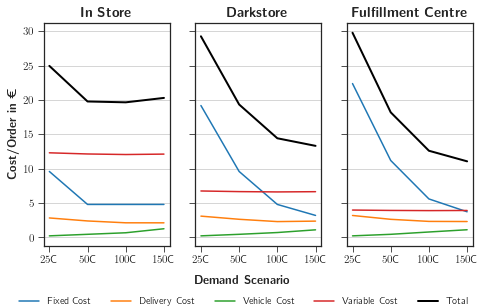

In [56]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=set_size(500), sharey=True)

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")

ax1.plot(labels, IS["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(labels, IS["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, IS["Fixed_V"], label="Vehicle Cost")
ax1.plot(labels, IS["Var_per_order"], label="Variable Cost")
ax1.plot(labels, IS["Total"], color = "black", lw=2, label="Total")

ax2.plot(labels, D["FixedDC_per_order"])
ax2.plot(labels, D["Trans_per_order"])
ax2.plot(labels, D["Fixed_V"])
ax2.plot(labels, D["Var_per_order"])
ax2.plot(labels, D["Total"], color = "black", lw=2, label="Total")

ax3.plot(labels, FC["FixedDC_per_order"])
ax3.plot(labels, FC["Trans_per_order"])
ax3.plot(labels, FC["Fixed_V"])
ax3.plot(labels, FC["Var_per_order"])
ax3.plot(labels, FC["Total"], color = "black", lw=2, label="Total")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
fig.savefig("result_graph/demand_scenario_cost_structure.svg", format = "svg")

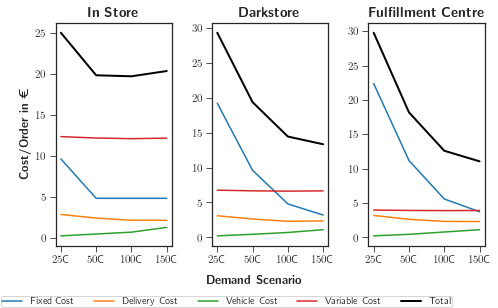

In [48]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=set_size(500), sharex=True)

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")

ax1.plot(labels, IS["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(labels, IS["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, IS["Fixed_V"], label="Vehicle Cost")
ax1.plot(labels, IS["Var_per_order"], label="Variable Cost")
ax1.plot(labels, IS["Total"], color = "black", lw=2, label="Total")

ax2.plot(labels, D["FixedDC_per_order"])
ax2.plot(labels, D["Trans_per_order"])
ax2.plot(labels, D["Fixed_V"])
ax2.plot(labels, D["Var_per_order"])
ax2.plot(labels, D["Total"], color = "black", lw=2, label="Total")

ax3.plot(labels, FC["FixedDC_per_order"])
ax3.plot(labels, FC["Trans_per_order"])
ax3.plot(labels, FC["Fixed_V"])
ax3.plot(labels, FC["Var_per_order"])
ax3.plot(labels, FC["Total"], color = "black", lw=2, label="Total")


#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', frameon=True,
           fancybox=True, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
#fig.savefig("result_graph/comp_methods_and_demand.svg", format = "svg")

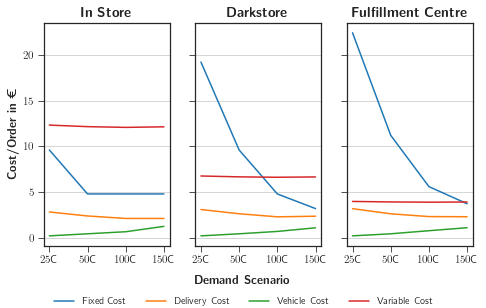

In [59]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=set_size(500), sharey=True)

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")

ax1.plot(labels, IS["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(labels, IS["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, IS["Fixed_V"], label="Vehicle Cost")
ax1.plot(labels, IS["Var_per_order"], label="Variable Cost")
#ax1.plot(labels, IS["Total"], color = "black", lw=2, label="Total")

ax2.plot(labels, D["FixedDC_per_order"])
ax2.plot(labels, D["Trans_per_order"])
ax2.plot(labels, D["Fixed_V"])
ax2.plot(labels, D["Var_per_order"])
#ax2.plot(labels, D["Total"], color = "black", lw=2, label="Total")

ax3.plot(labels, FC["FixedDC_per_order"])
ax3.plot(labels, FC["Trans_per_order"])
ax3.plot(labels, FC["Fixed_V"])
ax3.plot(labels, FC["Var_per_order"])
#ax3.plot(labels, FC["Total"], color = "black", lw=2, label="Total")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
#fig.savefig("result_graph/demand_scenario_cost_structure.svg", format = "svg")

In [67]:
alb_pup_A_merged =  pd.read_hdf("results/PuP/Alb_D_pup_A/alb_D_pup_A_merged.h5")
alb_pup_B_merged = pd.read_hdf("results/PuP/Alb_D_pup_B/alb_D_pup_B_merged.h5")
alb_pup_C_merged = pd.read_hdf("results/PuP/Alb_D_pup_C/alb_D_pup_C_merged.h5")

In [182]:
alb_D_A100 = alb_pup_A_merged[10:15]
alb_D_A100["total_per"] = alb_D_A100["Total_Cost"] / 100
alb_D_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,4,77129.0,6630.0,8.0,4.3,480.0,45.8,706.35,90.0,1322.15,...,11.45,33.95,120.0,330.54,4838.0,0.27,Albstadt,PuP,mid,13.2215
12,4,77129.0,6630.0,8.0,4.3,480.0,45.8,671.31,90.0,1287.11,...,11.45,33.95,120.0,321.78,4598.0,0.28,Albstadt,PuP,mid,12.8711
13,4,77129.0,6630.0,8.0,4.3,480.0,45.8,676.42,90.0,1292.22,...,11.45,33.95,120.0,323.06,4633.0,0.28,Albstadt,PuP,mid,12.9222
14,4,77129.0,6630.0,8.0,4.3,480.0,45.8,704.89,90.0,1320.69,...,11.45,33.95,120.0,330.17,4828.0,0.27,Albstadt,PuP,mid,13.2069
15,4,77129.0,6630.0,8.0,4.3,480.0,45.8,697.59,90.0,1313.39,...,11.45,33.95,120.0,328.35,4778.0,0.27,Albstadt,PuP,mid,13.1339


In [183]:
alb_D_B100 = alb_pup_B_merged[10:15]
alb_D_B100["total_per"] = alb_D_B100["Total_Cost"] / 100
alb_D_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,8,85952.0,8537.0,11.0,4.6,480.0,56.58,709.85,67.5,1313.93,...,7.07,15.51,60.0,164.24,4862.0,0.27,Albstadt,PuP,mid,13.1393
12,8,75000.0,7768.0,11.0,5.1,480.0,50.90,659.19,67.5,1257.59,...,6.36,14.80,60.0,157.20,4515.0,0.28,Albstadt,PuP,mid,12.5759
13,8,73621.0,7747.0,11.0,5.1,480.0,50.55,655.54,67.5,1253.59,...,6.32,14.76,60.0,156.70,4490.0,0.28,Albstadt,PuP,mid,12.5359
14,8,92408.0,9146.0,11.0,4.3,480.0,60.67,706.64,67.5,1314.81,...,7.58,16.02,60.0,164.35,4840.0,0.27,Albstadt,PuP,mid,13.1481
15,8,78326.0,8298.0,11.0,4.8,480.0,54.05,665.61,67.5,1267.16,...,6.76,15.19,60.0,158.40,4559.0,0.28,Albstadt,PuP,mid,12.6716


In [184]:
alb_D_C100 = alb_pup_C_merged[10:15]
alb_D_C100["total_per"] = alb_D_C100["Total_Cost"] / 100
alb_D_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,14,87536.00,11037.00,17.000000,5.5,480.000000,68.90,711.02,67.500000,1327.42,...,4.92,9.74,34.29,94.82,4870.0,0.27,Albstadt,PuP,mid,13.2742
12,14,84107.00,10738.00,17.000000,5.7,480.000000,66.84,657.29,67.500000,1271.63,...,4.77,9.60,34.29,90.83,4502.0,0.28,Albstadt,PuP,mid,12.7163
13,14,84107.00,10738.00,17.000000,5.7,480.000000,66.84,654.37,67.500000,1268.71,...,4.77,9.60,34.29,90.62,4482.0,0.28,Albstadt,PuP,mid,12.6871
14,14,88033.92,11292.99,16.999984,5.4,479.999998,70.23,742.26,67.499938,1359.99,...,5.02,9.84,34.29,97.14,5084.0,0.27,Albstadt,PuP,mid,13.5999
15,14,90569.92,11485.99,16.999985,5.3,480.000000,71.61,689.70,67.499939,1308.81,...,5.12,9.94,34.29,93.49,4724.0,0.28,Albstadt,PuP,mid,13.0881


In [69]:
wue_pup_A_merged =  pd.read_hdf("results/PuP/Wue_D_pup_A/wue_D_pup_A_merged.h5")
wue_pup_B_merged = pd.read_hdf("results/PuP/Wue_D_pup_B/wue_D_pup_B_merged.h5")
wue_pup_C_merged = pd.read_hdf("results/PuP/Wue_D_pup_C/wue_D_pup_C_merged.h5")

In [185]:
wue_D_A100 = wue_pup_A_merged[10:15]
wue_D_A100["total_per"] = wue_D_A100["Total_Cost"] / 100
wue_D_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,6,112578.0,9992.0,9.0,3.2,480.0,68.37,697.00,67.5,1312.87,...,11.4,22.64,80.0,218.81,4774.0,0.28,Wuerzburg,PuP,mid,13.1287
12,6,112578.0,9992.0,9.0,3.2,480.0,68.37,676.42,67.5,1292.29,...,11.4,22.64,80.0,215.38,4633.0,0.28,Wuerzburg,PuP,mid,12.9229
13,6,112578.0,9992.0,9.0,3.2,480.0,68.37,659.63,67.5,1275.50,...,11.4,22.64,80.0,212.58,4518.0,0.28,Wuerzburg,PuP,mid,12.7550
14,6,112578.0,9992.0,9.0,3.2,480.0,68.37,701.53,67.5,1317.40,...,11.4,22.64,80.0,219.57,4805.0,0.27,Wuerzburg,PuP,mid,13.1740
15,6,112578.0,9992.0,9.0,3.2,480.0,68.37,677.15,67.5,1293.02,...,11.4,22.64,80.0,215.50,4638.0,0.28,Wuerzburg,PuP,mid,12.9302


In [186]:
wue_D_B100 = wue_pup_B_merged[10:15]
wue_D_B100["total_per"] = wue_D_B100["Total_Cost"] / 100
wue_D_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,10,130934.0,12840.0,13.0,3.6,480.0,85.39,691.31,67.5,1324.20,...,8.54,15.29,48.0,132.42,4735.0,0.28,Wuerzburg,PuP,mid,13.2420
12,10,119550.0,12094.0,13.0,3.9,480.0,79.75,654.37,67.5,1281.62,...,7.98,14.72,48.0,128.16,4482.0,0.29,Wuerzburg,PuP,mid,12.8162
13,10,115876.0,12029.0,13.0,3.9,480.0,78.78,647.22,67.5,1273.50,...,7.88,14.63,48.0,127.35,4433.0,0.29,Wuerzburg,PuP,mid,12.7350
14,10,121132.0,12511.0,13.0,3.7,480.0,82.04,715.55,67.5,1345.09,...,8.20,14.95,48.0,134.51,4901.0,0.27,Wuerzburg,PuP,mid,13.4509
15,10,118295.0,12035.0,13.0,3.9,480.0,79.24,668.68,67.5,1295.42,...,7.92,14.67,48.0,129.54,4580.0,0.28,Wuerzburg,PuP,mid,12.9542


In [187]:
wue_D_C100 = wue_pup_C_merged[10:15]
wue_D_C100["total_per"] = wue_D_C100["Total_Cost"] / 100
wue_D_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,25,142677.87,20122.98,27.999976,5.0,480.0,122.57,659.34,67.499934,1329.41,...,4.90,7.60,19.2,53.18,4516.0,0.29,Wuerzburg,PuP,mid,13.2941
12,25,142161.88,19791.99,27.999996,5.1,480.0,120.89,629.41,67.499902,1297.80,...,4.84,7.54,19.2,51.91,4311.0,0.30,Wuerzburg,PuP,mid,12.9780
13,25,142473.00,19952.00,28.000000,5.1,480.0,121.72,623.86,67.500000,1293.08,...,4.87,7.57,19.2,51.72,4273.0,0.30,Wuerzburg,PuP,mid,12.9308
14,25,145307.98,20334.00,27.999998,5.0,480.0,124.07,733.36,67.499947,1404.93,...,4.96,7.66,19.2,56.20,5023.0,0.28,Wuerzburg,PuP,mid,14.0493
15,25,143166.00,20009.00,28.000000,5.0,480.0,122.11,646.63,67.500000,1316.24,...,4.88,7.58,19.2,52.65,4429.0,0.30,Wuerzburg,PuP,mid,13.1624


In [ ]:
#Make X axis PUL Scenarios, and lines individual facility types, Y axis = Cost per order

In [73]:
alb_IS_A_merged =  pd.read_hdf("results/PuP/Alb_IS_pup_A/alb_IS_pup_A_merged.h5")
alb_IS_B_merged = pd.read_hdf("results/PuP/Alb_IS_pup_B/alb_IS_pup_B_merged.h5")
alb_IS_C_merged = pd.read_hdf("results/PuP/Alb_IS_pup_C/alb_IS_pup_C_merged.h5")

In [188]:
alb_IS_A100 = alb_IS_A_merged[10:15]
alb_IS_A100["total_per"] = alb_IS_A100["Total_Cost"] / 100
alb_IS_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,4,22273.0,3223.0,8.0,8.9,480.0,19.53,1286.91,90.0,1876.44,...,4.88,27.38,120.0,469.11,4838.0,0.39,Albstadt,PuP,mid,18.7644
12,4,22273.0,3223.0,8.0,8.9,480.0,19.53,1223.07,90.0,1812.60,...,4.88,27.38,120.0,453.15,4598.0,0.39,Albstadt,PuP,mid,18.1260
13,4,22273.0,3223.0,8.0,8.9,480.0,19.53,1232.38,90.0,1821.91,...,4.88,27.38,120.0,455.48,4633.0,0.39,Albstadt,PuP,mid,18.2191
14,4,22273.0,3223.0,8.0,8.9,480.0,19.53,1284.25,90.0,1873.78,...,4.88,27.38,120.0,468.44,4828.0,0.39,Albstadt,PuP,mid,18.7378
15,4,22273.0,3223.0,8.0,8.9,480.0,19.53,1270.95,90.0,1860.48,...,4.88,27.38,120.0,465.12,4778.0,0.39,Albstadt,PuP,mid,18.6048


In [189]:
alb_IS_B100 = alb_IS_B_merged[10:15]
alb_IS_B100["total_per"] = alb_IS_B100["Total_Cost"] / 100
alb_IS_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,8,43447.0,6143.0,12.0,7.0,480.0,37.40,1293.29,90.0,1900.69,...,4.68,15.92,60.0,237.59,4862.0,0.39,Albstadt,PuP,mid,19.0069
12,8,38250.0,5941.0,11.0,6.7,480.0,35.50,1200.99,67.5,1783.99,...,4.44,12.88,60.0,223.00,4515.0,0.40,Albstadt,PuP,mid,17.8399
13,8,41931.0,5785.0,11.0,6.8,480.0,35.40,1194.34,67.5,1777.24,...,4.42,12.86,60.0,222.16,4490.0,0.40,Albstadt,PuP,mid,17.7724
14,8,43232.0,6119.0,12.0,7.1,480.0,37.24,1287.44,90.0,1894.68,...,4.66,15.90,60.0,236.84,4840.0,0.39,Albstadt,PuP,mid,18.9468
15,8,44847.0,6113.0,11.0,6.5,480.0,37.50,1212.69,67.5,1797.69,...,4.69,13.12,60.0,224.71,4559.0,0.39,Albstadt,PuP,mid,17.9769


In [190]:
alb_IS_C100 = alb_IS_C_merged[10:15]
alb_IS_C100["total_per"] = alb_IS_C100["Total_Cost"] / 100
alb_IS_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,14,52151.00,9170.00,18.000000,7.1,480.0,53.54,1295.42,90.000000,1918.96,...,3.82,10.25,34.29,137.07,4870.0,0.39,Albstadt,PuP,mid,19.1896
12,14,53751.00,9050.00,17.000000,6.8,480.0,53.26,1197.53,67.500000,1798.29,...,3.80,8.63,34.29,128.45,4502.0,0.40,Albstadt,PuP,mid,17.9829
13,14,53751.00,9050.00,17.000000,6.8,480.0,53.26,1192.21,67.500000,1792.97,...,3.80,8.63,34.29,128.07,4482.0,0.40,Albstadt,PuP,mid,17.9297
14,14,53344.00,9273.00,18.000000,7.0,480.0,54.25,1352.34,90.000000,1976.59,...,3.88,10.30,34.29,141.18,5084.0,0.39,Albstadt,PuP,mid,19.7659
15,14,59643.94,9651.99,16.999984,6.3,480.0,57.21,1256.58,67.499936,1861.29,...,4.09,8.91,34.29,132.95,4724.0,0.39,Albstadt,PuP,mid,18.6129


In [77]:
wue_IS_A_merged =  pd.read_hdf("results/PuP/Wue_IS_pup_A/wue_IS_pup_A_merged.h5")
wue_IS_B_merged = pd.read_hdf("results/PuP/Wue_IS_pup_B/wue_IS_pup_B_merged.h5")
wue_IS_C_merged = pd.read_hdf("results/PuP/Wue_IS_pup_C/wue_IS_pup_C_merged.h5")

In [191]:
wue_IS_A100 = wue_IS_A_merged[10:15]
wue_IS_A100["total_per"] = wue_IS_A100["Total_Cost"] / 100
wue_IS_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,6,45324.0,6130.0,10.0,5.9,480.000000,37.68,1269.88,90.0,1877.56,...,6.28,21.28,80.0,312.93,4774.0,0.39,Wuerzburg,PuP,mid,18.7756
12,6,44008.0,5852.0,9.0,5.5,480.000000,36.10,1232.38,67.5,1815.98,...,6.02,17.27,80.0,302.66,4633.0,0.39,Wuerzburg,PuP,mid,18.1598
13,6,44008.0,5851.0,9.0,5.5,480.000000,36.09,1201.79,67.5,1785.38,...,6.02,17.26,80.0,297.56,4518.0,0.40,Wuerzburg,PuP,mid,17.8538
14,6,48211.0,6503.0,10.0,5.5,480.000000,39.99,1278.13,90.0,1888.12,...,6.66,21.67,80.0,314.69,4805.0,0.39,Wuerzburg,PuP,mid,18.8812
15,6,62840.0,7496.0,9.0,4.3,479.999937,47.40,1233.71,67.5,1828.61,...,7.90,19.15,80.0,304.77,4638.0,0.39,Wuerzburg,PuP,mid,18.2861


In [192]:
wue_IS_B100 = wue_IS_B_merged[10:15]
wue_IS_B100["total_per"] = wue_IS_B100["Total_Cost"] / 100
wue_IS_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,10,73192.0,10174.0,13.0,4.6,480.0,62.16,1259.51,67.5,1869.17,...,6.22,12.97,48.0,186.92,4735.0,0.39,Wuerzburg,PuP,mid,18.6917
12,10,52193.0,8553.0,13.0,5.5,480.0,50.57,1192.21,67.5,1790.28,...,5.06,11.81,48.0,179.03,4482.0,0.40,Wuerzburg,PuP,mid,17.9028
13,10,52193.0,8553.0,13.0,5.5,480.0,50.57,1179.18,67.5,1777.25,...,5.06,11.81,48.0,177.72,4433.0,0.40,Wuerzburg,PuP,mid,17.7725
14,10,52193.0,8554.0,14.0,5.9,480.0,50.58,1303.67,90.0,1924.25,...,5.06,14.06,48.0,192.42,4901.0,0.39,Wuerzburg,PuP,mid,19.2425
15,10,47414.0,8162.0,13.0,5.7,480.0,47.83,1218.28,67.5,1813.61,...,4.78,11.53,48.0,181.36,4580.0,0.40,Wuerzburg,PuP,mid,18.1361


1869.17

In [193]:
wue_IS_C100 = wue_IS_C_merged[10:15]
wue_IS_C100["total_per"] = wue_IS_C100["Total_Cost"] / 100
wue_IS_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,25,109287.0,18848.0,28.0,5.3,480.0,110.42,1201.26,67.5,1859.18,...,4.42,7.12,19.2,74.37,4516.0,0.41,Wuerzburg,PuP,mid,18.5918
12,25,103036.0,18921.0,28.0,5.3,480.0,109.65,1146.73,67.5,1803.88,...,4.39,7.09,19.2,72.16,4311.0,0.42,Wuerzburg,PuP,mid,18.0388
13,25,101789.0,18673.0,28.0,5.4,480.0,108.23,1136.62,67.5,1792.35,...,4.33,7.03,19.2,71.69,4273.0,0.42,Wuerzburg,PuP,mid,17.9235
14,25,83860.0,17130.0,29.0,6.1,480.0,97.57,1336.12,90.0,2003.69,...,3.90,7.50,19.2,80.15,5023.0,0.40,Wuerzburg,PuP,mid,20.0369
15,25,100596.0,18681.0,28.0,5.4,480.0,108.06,1178.11,67.5,1833.67,...,4.32,7.02,19.2,73.35,4429.0,0.41,Wuerzburg,PuP,mid,18.3367


In [86]:
alb_F_A_merged =  pd.read_hdf("results/PuP/Alb_F_pup_A/alb_F_pup_A_merged.h5")
alb_F_B_merged = pd.read_hdf("results/PuP/Alb_F_pup_B/alb_F_pup_B_merged.h5")
alb_F_C_merged = pd.read_hdf("results/PuP/Alb_F_pup_C/alb_F_pup_C_merged.h5")
alb_F_A_merged["FixedDC_Cost"] = 560
alb_F_A_merged["Total_Cost"] = alb_F_A_merged["Total_Cost"] - 80

alb_F_B_merged["FixedDC_Cost"] = 560
alb_F_B_merged["Total_Cost"] = alb_F_B_merged["Total_Cost"] - 80

alb_F_C_merged["FixedDC_Cost"] = 560
alb_F_C_merged["Total_Cost"] = alb_F_C_merged["Total_Cost"] - 80

alb_F_A_merged.to_hdf("results/PuP/Alb_F_pup_A/alb_F_pup_A_merged_new.h5", key='df', mode='w')
alb_F_B_merged.to_hdf('results/PuP/Alb_F_pup_B/alb_F_pup_B_merged_new.h5', key='df', mode='w')
alb_F_C_merged.to_hdf("results/PuP/Alb_F_pup_C/alb_F_pup_C_merged_new.h5", key='df', mode='w')

In [194]:
alb_F_A100 = alb_F_A_merged[10:15]
alb_F_A100["total_per"] = alb_F_A100["Total_Cost"] / 100
alb_F_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,4,77129.0,6630.0,8.0,4.3,560,45.8,416.07,90.0,1111.87,...,11.45,33.95,160.0,297.97,4838.0,0.25,Albstadt,PuP,mid,11.1187
12,4,77129.0,6630.0,8.0,4.3,560,45.8,395.43,90.0,1091.23,...,11.45,33.95,160.0,292.81,4598.0,0.25,Albstadt,PuP,mid,10.9123
13,4,77129.0,6630.0,8.0,4.3,560,45.8,398.44,90.0,1094.24,...,11.45,33.95,160.0,293.56,4633.0,0.25,Albstadt,PuP,mid,10.9424
14,4,77129.0,6630.0,8.0,4.3,560,45.8,415.21,90.0,1111.01,...,11.45,33.95,160.0,297.75,4828.0,0.25,Albstadt,PuP,mid,11.1101
15,4,77129.0,6630.0,8.0,4.3,560,45.8,410.91,90.0,1106.71,...,11.45,33.95,160.0,296.68,4778.0,0.25,Albstadt,PuP,mid,11.0671


In [195]:
alb_F_B100 = alb_F_B_merged[10:15]
alb_F_B100["total_per"] = alb_F_B100["Total_Cost"] / 100
alb_F_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,8,85952.0,8537.0,11.0,4.6,560,56.58,418.13,67.5,1102.21,...,7.07,15.51,80.0,147.78,4862.0,0.24,Albstadt,PuP,mid,11.0221
12,8,75000.0,7768.0,11.0,5.1,560,50.90,388.29,67.5,1066.69,...,6.36,14.80,80.0,143.34,4515.0,0.25,Albstadt,PuP,mid,10.6669
13,8,73621.0,7747.0,11.0,5.1,560,50.55,386.14,67.5,1064.19,...,6.32,14.76,80.0,143.02,4490.0,0.25,Albstadt,PuP,mid,10.6419
14,8,92410.0,9220.0,11.0,4.3,560,61.02,416.24,67.5,1104.76,...,7.63,16.06,80.0,148.10,4840.0,0.24,Albstadt,PuP,mid,11.0476
15,8,78114.0,8339.0,11.0,4.7,560,54.21,392.07,67.5,1073.78,...,6.78,15.21,80.0,144.22,4559.0,0.25,Albstadt,PuP,mid,10.7378


In [196]:
alb_F_C100 = alb_F_C_merged[10:15]
alb_F_C100["total_per"] = alb_F_C100["Total_Cost"] / 100
alb_F_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,14,90569.94,11485.99,16.999989,5.3,560,71.61,418.82,67.499941,1117.93,...,5.12,9.94,45.71,85.57,4870.0,0.25,Albstadt,PuP,mid,11.1793
12,14,84106.94,10737.99,16.999987,5.7,560,66.84,387.17,67.499950,1081.51,...,4.77,9.60,45.71,82.96,4502.0,0.26,Albstadt,PuP,mid,10.8151
13,14,84106.96,10737.99,16.999992,5.7,560,66.84,385.45,67.499967,1079.79,...,4.77,9.60,45.71,82.84,4482.0,0.26,Albstadt,PuP,mid,10.7979
14,14,88034.00,11293.00,17.000000,5.4,560,70.23,437.22,67.500000,1134.95,...,5.02,9.84,45.71,86.78,5084.0,0.24,Albstadt,PuP,mid,11.3495
15,14,87737.00,11022.00,17.000000,5.6,560,68.86,406.26,67.500000,1102.62,...,4.92,9.74,45.71,84.47,4724.0,0.25,Albstadt,PuP,mid,11.0262


In [90]:
wue_F_A_merged =  pd.read_hdf("results/PuP/Wue_F_pup_A/wue_F_pup_A_merged.h5")
wue_F_B_merged = pd.read_hdf("results/PuP/Wue_F_pup_B/wue_F_pup_B_merged.h5")
wue_F_C_merged = pd.read_hdf("results/PuP/Wue_F_pup_C/wue_F_pup_C_merged.h5")
wue_F_A_merged["FixedDC_Cost"] = 560
wue_F_A_merged["Total_Cost"] = wue_F_A_merged["Total_Cost"] - 80

wue_F_B_merged["FixedDC_Cost"] = 560
wue_F_B_merged["Total_Cost"] = wue_F_B_merged["Total_Cost"] - 80

wue_F_C_merged["FixedDC_Cost"] = 560
wue_F_C_merged["Total_Cost"] = wue_F_C_merged["Total_Cost"] - 80

wue_F_A_merged.to_hdf("results/PuP/Wue_F_pup_A/wue_F_pup_A_merged_new.h5", key='df', mode='w')
wue_F_B_merged.to_hdf('results/PuP/Wue_F_pup_B/wue_F_pup_B_merged_new.h5', key='df', mode='w')
wue_F_C_merged.to_hdf("results/PuP/Wue_F_pup_C/wue_F_pup_C_merged_new.h5", key='df', mode='w')

In [197]:
wue_F_A100 = wue_F_A_merged[10:15]
wue_F_A100["total_per"] = wue_F_A100["Total_Cost"] / 100
wue_F_A100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,6,112578.0,9992.0,9.0,3.2,560,68.37,410.56,67.5,1106.43,...,11.4,22.64,106.67,197.74,4774.0,0.25,Wuerzburg,PuP,mid,11.0643
12,6,112578.0,9992.0,9.0,3.2,560,68.37,398.44,67.5,1094.31,...,11.4,22.64,106.67,195.72,4633.0,0.25,Wuerzburg,PuP,mid,10.9431
13,6,112578.0,9992.0,9.0,3.2,560,68.37,388.55,67.5,1084.42,...,11.4,22.64,106.67,194.07,4518.0,0.26,Wuerzburg,PuP,mid,10.8442
14,6,112578.0,9992.0,9.0,3.2,560,68.37,413.23,67.5,1109.10,...,11.4,22.64,106.67,198.18,4805.0,0.25,Wuerzburg,PuP,mid,11.0910
15,6,112578.0,9992.0,9.0,3.2,560,68.37,398.87,67.5,1094.74,...,11.4,22.64,106.67,195.79,4638.0,0.25,Wuerzburg,PuP,mid,10.9474


In [198]:
wue_F_B100 = wue_F_B_merged[10:15]
wue_F_B100["total_per"] = wue_F_B100["Total_Cost"] / 100
wue_F_B100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,10,130934.0,12840.0,13.0,3.6,560,85.39,407.21,67.5,1120.10,...,8.54,15.29,64.0,120.01,4735.0,0.25,Wuerzburg,PuP,mid,11.2010
12,10,119550.0,12094.0,13.0,3.9,560,79.75,385.45,67.5,1092.70,...,7.98,14.72,64.0,117.27,4482.0,0.26,Wuerzburg,PuP,mid,10.9270
13,10,115876.0,12029.0,13.0,3.9,560,78.78,381.24,67.5,1087.52,...,7.88,14.63,64.0,116.75,4433.0,0.26,Wuerzburg,PuP,mid,10.8752
14,10,121132.0,12511.0,13.0,3.7,560,82.04,421.49,67.5,1131.03,...,8.20,14.95,64.0,121.10,4901.0,0.25,Wuerzburg,PuP,mid,11.3103
15,10,118295.0,12035.0,13.0,3.9,560,79.24,393.88,67.5,1100.62,...,7.92,14.67,64.0,118.06,4580.0,0.26,Wuerzburg,PuP,mid,11.0062


In [199]:
wue_F_C100 = wue_F_C_merged[10:15]
wue_F_C100["total_per"] = wue_F_C100["Total_Cost"] / 100
wue_F_C100

,Customers_N,Distance,Time,Stops,Stops_h,FixedDC_Cost,Trans_Cost,Variable_DC,Fixed_V,Total_Cost,...,Trans_per_order,Transp_order_with_V,FixedDC_per_order,Total_Cost_per_order,Items,Cost_per_item,City,Scenario,D_Scenario,total_per
11,25,144560.00,20071.00,28.000000,5.0,560,122.66,388.38,67.500000,1138.54,...,4.91,7.61,25.6,48.74,4516.0,0.27,Wuerzburg,PuP,mid,11.3854
12,25,142161.87,19791.98,27.999976,5.1,560,120.89,370.75,67.499937,1119.14,...,4.84,7.54,25.6,47.97,4311.0,0.28,Wuerzburg,PuP,mid,11.1914
13,25,143480.91,20061.99,27.999982,5.0,560,122.43,367.48,67.499968,1117.41,...,4.90,7.60,25.6,47.90,4273.0,0.28,Wuerzburg,PuP,mid,11.1741
14,25,145308.00,20334.00,28.000000,5.0,560,124.07,431.98,67.500000,1183.55,...,4.96,7.66,25.6,50.54,5023.0,0.25,Wuerzburg,PuP,mid,11.8355
15,25,143166.00,20009.00,28.000000,5.0,560,122.11,380.89,67.500000,1130.50,...,4.88,7.58,25.6,48.42,4429.0,0.27,Wuerzburg,PuP,mid,11.3050


In [107]:
e = wue_F_C100["Total_Cost"].mean()
v =  wue_F_B100["Total_Cost"].mean()
g =  wue_F_A100["Total_Cost"].mean()
wue_F_pul = [float(g), float(v), float(e)]
wue_F_pul

[1097.8, 1106.394, 1137.828]

In [108]:
e = wue_D_C100["Total_Cost"].mean()
v =  wue_D_B100["Total_Cost"].mean()
g =  wue_D_A100["Total_Cost"].mean()
wue_D_pul = [float(g), float(v), float(e)]
wue_D_pul

[1298.216, 1303.966, 1328.292]

In [109]:
e = wue_IS_C100["Total_Cost"].mean()
v =  wue_IS_B100["Total_Cost"].mean()
g =  wue_IS_A100["Total_Cost"].mean()
wue_IS_pul = [float(g), float(v), float(e)]
wue_IS_pul

[1839.1299999999999, 1834.9119999999998, 1858.554]

In [110]:
e = alb_F_C100["Total_Cost"].mean()
v =  alb_F_B100["Total_Cost"].mean()
g =  alb_F_A100["Total_Cost"].mean()
alb_F_pul = [float(g), float(v), float(e)]
alb_F_pul

[1103.0120000000002, 1082.326, 1103.3600000000001]

In [111]:
e = alb_D_C100["Total_Cost"].mean()
v =  alb_D_B100["Total_Cost"].mean()
g =  alb_D_A100["Total_Cost"].mean()
alb_D_pul = [float(g), float(v), float(e)]
alb_D_pul

[1307.112, 1281.416, 1307.312]

In [112]:
e = alb_IS_C100["Total_Cost"].mean()
v =  alb_IS_B100["Total_Cost"].mean()
g =  alb_IS_A100["Total_Cost"].mean()
alb_IS_pul = [float(g), float(v), float(e)]
alb_IS_pul

[1849.042, 1830.8580000000002, 1869.6200000000001]

In [ ]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3]
labels = ["Scen. A","Scen. B", "Scen. C"]


fig, ax1 = plt.subplots(1,1, figsize=set_size(500), sharey=True)

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)

ax1.boxplot(alb_demand, 
           patch_artist=True, widths=0.65,
           boxprops=dict(facecolor="#1f77b4", color="black", alpha=0.8),
           medianprops=dict(color="black"))

ax1.yaxis.grid(True)
#ax2.yaxis.grid(True)
#ax3.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
#fig.savefig("result_graph/demand_scenario_cost_structure.svg", format = "svg")

In [113]:
wue_fc_a = wue_F_A100["Total_Cost"].tolist()
wue_fc_a

[1106.43, 1094.31, 1084.42, 1109.1, 1094.74]

In [300]:
alb_IS_grp

[[18.764400000000002, 18.125999999999998, 18.2191, 18.7378, 18.6048],
 [19.0069, 17.8399, 17.7724, 18.9468, 17.9769],
 [19.1896, 17.9829, 17.9297, 19.7659, 18.6129]]

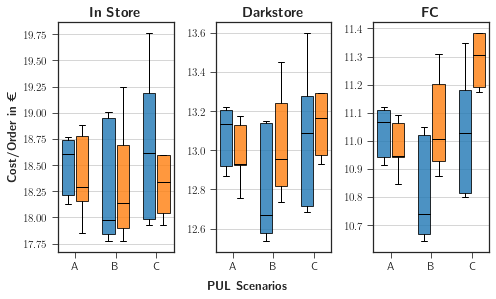

In [203]:
plt.style.use("seaborn-ticks")

xticks = [0, 2, 4]
labels = ["A","B", "C"]
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=set_size(510))

ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{FC}", fontsize=14)
# IS Data
wue_IS_a = wue_IS_A100["total_per"].tolist()
wue_IS_b = wue_IS_B100["total_per"].tolist()
wue_IS_c = wue_IS_C100["total_per"].tolist()

alb_IS_a = alb_IS_A100["total_per"].tolist()
alb_IS_b = alb_IS_B100["total_per"].tolist()
alb_IS_c = alb_IS_C100["total_per"].tolist()

wue_IS_grp = [wue_IS_a, wue_IS_b, wue_IS_c]
alb_IS_grp = [alb_IS_a, alb_IS_b, alb_IS_c]

# Darkstore Data
wue_D_a = wue_D_A100["total_per"].tolist()
wue_D_b = wue_D_B100["total_per"].tolist()
wue_D_c = wue_D_C100["total_per"].tolist()

alb_D_a = alb_D_A100["total_per"].tolist()
alb_D_b = alb_D_B100["total_per"].tolist()
alb_D_c = alb_D_C100["total_per"].tolist()

wue_D_grp = [wue_D_a, wue_D_b, wue_D_c]
alb_D_grp = [alb_D_a, alb_D_b, alb_D_c]

# FC Data
wue_fc_a = wue_F_A100["total_per"].tolist()
wue_fc_b = wue_F_B100["total_per"].tolist()
wue_fc_c = wue_F_C100["total_per"].tolist()

alb_fc_a = alb_F_A100["total_per"].tolist()
alb_fc_b = alb_F_B100["total_per"].tolist()
alb_fc_c = alb_F_C100["total_per"].tolist()

wue_F_grp = [wue_fc_a, wue_fc_b, wue_fc_c]
alb_F_grp = [alb_fc_a, alb_fc_b, alb_fc_c]
 

# IS PLOT

alb_IS_plot = ax1.boxplot(alb_IS_grp, showfliers=False,
                               positions=np.array(
    np.arange(len(alb_IS_grp)))*2-0.35,
                               widths=0.6, patch_artist=True,
                          boxprops=dict(facecolor = '#1f77b4', color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_IS_plot = ax1.boxplot(wue_IS_grp, labels=None, showfliers=False,
                               positions=np.array(
    np.arange(len(wue_IS_grp)))*2+0.35, widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor = '#ff7f0e', color="black", alpha=0.8 ),
                         medianprops=dict(color="black")) 
    
    
#D PLOT
alb_D_plot = ax2.boxplot(alb_D_grp, showfliers=False,
                               positions=np.array(
    np.arange(len(alb_D_grp)))*2-0.35,
                               widths=0.6, patch_artist=True,
                          boxprops=dict(facecolor = '#1f77b4', color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_D_plot = ax2.boxplot(wue_D_grp, labels=None,showfliers=False,
                               positions=np.array(
    np.arange(len(wue_D_grp)))*2+0.35, widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor = '#ff7f0e', color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))    
    
    
    
    
#FC PLOT
alb_FC_plot = ax3.boxplot(alb_F_grp,showfliers=False,
                               positions=np.array(
    np.arange(len(alb_F_grp)))*2-0.35,
                               widths=0.6, patch_artist=True,
                          boxprops=dict(facecolor = '#1f77b4', color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_FC_plot = ax3.boxplot(wue_F_grp, labels=None,showfliers=False,
                               positions=np.array(
    np.arange(len(wue_F_grp)))*2+0.35, widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor = '#ff7f0e', color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))


ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)
ax3.set_xticks(xticks)
ax3.set_xticklabels(labels)
 
# set the x label values
#plt.xticks(np.arange(0, len(labels) * 2, 2.5), labels)
 
# set the limit for x axis
#plt.xlim(-1, len(labels)*2)
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
ax1.set_ylabel("\\textbf{Cost/Order in €}")
fig.supxlabel("\\textbf{PUL Scenarios}", y = 0.05, fontsize=12)
# set the limit for y axis
#plt.ylim(0, 50)
fig.tight_layout()
# set the title
plt.show()
fig.savefig("result_graph/pul_box_WIP.svg", format="svg")

In [209]:
alb_IS_a

[18.764400000000002, 18.125999999999998, 18.2191, 18.7378, 18.6048]

In [312]:
min(wue_D_grp)

[13.128699999999998, 12.9229, 12.755, 13.174000000000001, 12.9302]

In [ ]:
wue_D_grp = [wue_D_a, wue_D_b, wue_D_c]
alb_D_grp = [alb_D_a, alb_D_b, alb_D_c]

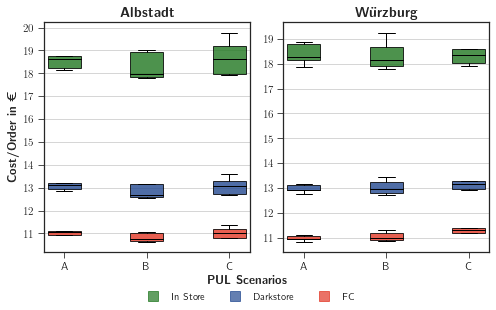

In [252]:
import matplotlib.lines as mlines
plt.style.use("seaborn-ticks")

low = mlines.Line2D([], [], color="#207720", marker="s", linestyle='None',
                          markersize=10, label='In Store', alpha = 0.7)
mid = mlines.Line2D([], [], color="#234990", marker='s', linestyle='None',
                          markersize=10, label='Darkstore', alpha = 0.7)
high = mlines.Line2D([], [], color = "#E23726", marker='s', linestyle='None',
                          markersize=10, label='FC', alpha = 0.7)


xticks = [0, 2, 4]
labels = ["A","B", "C"]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=set_size(510))

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)


A_grp_alb = [alb_IS_a, alb_D_a, alb_fc_a]
B_grp_alb = [alb_IS_b, alb_D_b, alb_fc_b]
C_grp_alb = [alb_IS_c, alb_D_c, alb_fc_c]

A_grp_wue = [wue_IS_a, wue_D_a, wue_fc_a]
B_grp_wue = [wue_IS_b, wue_D_b, wue_fc_b]
C_grp_wue = [wue_IS_c, wue_D_c, wue_fc_c]

alb_A_plot = ax1.boxplot(alb_IS_grp, labels=labels,
                               positions=np.array(
    np.arange(len(alb_IS_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor="#207720", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

Alb_B_plot = ax1.boxplot(alb_D_grp, labels=labels,
                               positions=np.array(
    np.arange(len(alb_D_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor = "#234990", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

Alb_C_plot = ax1.boxplot(alb_F_grp, labels=labels,
                               positions=np.array(
    np.arange(len(alb_F_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor = "#E23726", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_A_plot = ax2.boxplot(wue_IS_grp, showfliers=False,
                               positions=np.array(
    np.arange(len(wue_IS_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor="#207720", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_B_plot = ax2.boxplot(wue_D_grp, showfliers=False,
                               positions=np.array(
    np.arange(len(wue_D_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor = "#234990", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

wue_C_plot = ax2.boxplot(wue_F_grp, showfliers=False,
                               positions=np.array(
    np.arange(len(wue_F_grp)))*2,
                               widths=0.8, patch_artist=True,
                          boxprops=dict(facecolor = "#E23726", color="black", alpha=0.8 ),
                         medianprops=dict(color="black"))

ax1.set_xticks(xticks)
ax1.set_xticklabels(labels)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels)

loc =plticker.MultipleLocator(base=1)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)


#ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['A', 'B'], loc='upper right')
fig.legend(handles=[low, mid, high], loc= "lower center", labelspacing=0.2,
         prop={"size":"small"},  ncol=3)

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax1.set_ylabel("\\textbf{Cost/Order in €}")
fig.supxlabel("\\textbf{PUL Scenarios}", y = 0.07, fontsize=12)
fig.tight_layout()
fig.savefig("result_graph/pul_box_color_markets.svg", format="svg")
plt.show()

In [ ]:
# Alb IS -5.29
# Wue IS -6.86
# Alb D -8.49
# Wue D 10.7
# Alb F -12.23
#Wue F -12.63

In [338]:
Average(alb_IS_avg1)

18.4984

In [340]:
Average(alb_D_avg1)

12.986133333333333

In [342]:
Average(alb_F_avg1)

10.962326666666666

In [339]:
Average(data1)

19.533

In [341]:
Average(data2)

14.196000000000002

In [343]:
Average(data3)

12.487

In [344]:
Average(wue_IS_avg1)

18.441986666666665

In [345]:
Average(wue_D_avg1)

13.101580000000002

In [346]:
Average(wue_F_avg1)

11.140073333333332

In [347]:
Average(dataw1)

19.799

In [348]:
Average(dataw2)

14.669999999999996

In [349]:
Average(dataw3)

12.75

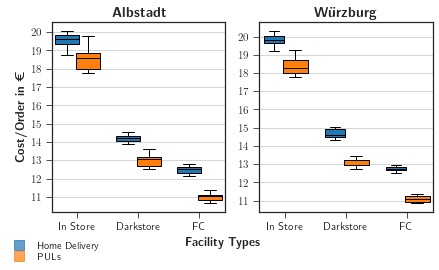

In [294]:
# comparison between PUL and Regular

plt.style.use("seaborn-ticks")


low = mlines.Line2D([], [], color='#1f77b4', marker="s", linestyle='None',
                          markersize=10, label='Home Delivery', alpha = 0.7)
mid = mlines.Line2D([], [], color="#ff7f0e", marker='s', linestyle='None',
                          markersize=10, label="PULs", alpha = 0.7)


#plt.rcParams.update({"ytick.labelsize" :12})
xticks = [0,2,4]
labels = ["In Store", "Darkstore", "FC"]
data1 = list_alb100[0]
data2 = list_alb100[1]
data3 = list_alb100[2]
data_alb = [data1, data2, data3]

dataw1 = list_wue100[0]
dataw2 = list_wue100[1]
dataw3 = list_wue100[2]
data_wue = [dataw1, dataw2, dataw3]


pul_alb = [alb_IS_avg1, alb_D_avg1, alb_F_avg1]
pul_wue = [wue_IS_avg1, wue_D_avg1, wue_F_avg1]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=set_size(445))

ax1.set_title("\\textbf{Albstadt}", fontsize=14)
ax2.set_title("\\textbf{Würzburg}", fontsize=14)


ax1.set_ylabel("\\textbf{Cost/Order in €}")
#ax.set_xlabel("\\textbf{Fulfillment Method}")
ax1.boxplot(data_alb, 
           patch_artist=True, widths=0.8,
           boxprops=dict(facecolor='#1f77b4', color="black"),
           medianprops=dict(color="black"),
            positions=np.array(
    np.arange(len(data_alb)))*2-0.35,)

ax1.boxplot(pul_alb, patch_artist=True, widths=0.8, showfliers=False,
           boxprops=dict(facecolor='#ff7f0e', color="black"),
           medianprops=dict(color="black"),
        positions=np.array(
    np.arange(len(pul_alb)))*2+0.35,)



loc =plticker.MultipleLocator(base=1)
ax1.yaxis.set_major_locator(loc)
ax2.yaxis.set_major_locator(loc)


ax2.boxplot(data_wue, 
           patch_artist=True, widths = 0.65,
           boxprops=dict(facecolor='#1f77b4', color="black"),
           medianprops=dict(color="black"),
           positions=np.array(
    np.arange(len(data_alb)))*2-0.35,)

ax2.boxplot(pul_wue, patch_artist=True, widths=0.8, showfliers=False,
           boxprops=dict(facecolor='#ff7f0e', color="black"),
           medianprops=dict(color="black"),
        positions=np.array(
    np.arange(len(pul_wue)))*2+0.35,)


ax1.set_xticks(xticks)
ax1.set_xticklabels(labels, rotation = 0)
ax2.set_xticks(xticks)
ax2.set_xticklabels(labels, rotation = 0)
fig.legend(handles=[low, mid], loc= "lower left", labelspacing=0.2,
         prop={"size":"small"},  ncol=1)
fig.supxlabel("\\textbf{Facility Types}", y = 0.07, fontsize=12)
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
fig.tight_layout()
fig.savefig("result_graph/HD_PUL_comparison.svg", format="svg")
plt.show()

In [273]:
e = alb_IS_C100["total_per"].tolist()
v =  alb_IS_B100["total_per"].tolist()
g =  alb_IS_A100["total_per"].tolist()
alb_IS_avg1 = e+v+g
alb_IS_avg1

[19.1896,
 17.9829,
 17.9297,
 19.7659,
 18.6129,
 19.0069,
 17.8399,
 17.7724,
 18.9468,
 17.9769,
 18.764400000000002,
 18.125999999999998,
 18.2191,
 18.7378,
 18.6048]

In [274]:
e = alb_F_C100["total_per"].tolist()
v =  alb_F_B100["total_per"].tolist()
g =  alb_F_A100["total_per"].tolist()
alb_F_avg1 = e+v+g
alb_F_avg1

[11.179300000000001,
 10.8151,
 10.7979,
 11.3495,
 11.0262,
 11.0221,
 10.6669,
 10.6419,
 11.0476,
 10.7378,
 11.118699999999999,
 10.9123,
 10.9424,
 11.1101,
 11.0671]

In [275]:
e = alb_D_C100["total_per"].tolist()
v =  alb_D_B100["total_per"].tolist()
g =  alb_D_A100["total_per"].tolist()
alb_D_avg1 = e+v+g
alb_D_avg1

[13.2742,
 12.7163,
 12.687100000000001,
 13.5999,
 13.088099999999999,
 13.1393,
 12.575899999999999,
 12.5359,
 13.1481,
 12.671600000000002,
 13.2215,
 12.871099999999998,
 12.9222,
 13.206900000000001,
 13.1339]

In [277]:
e = wue_IS_C100["total_per"].tolist()
v =  wue_IS_B100["total_per"].tolist()
g =  wue_IS_A100["total_per"].tolist()
wue_IS_avg1 = e+v+g
wue_IS_avg1

[18.5918,
 18.038800000000002,
 17.9235,
 20.0369,
 18.3367,
 18.6917,
 17.9028,
 17.7725,
 19.2425,
 18.1361,
 18.7756,
 18.1598,
 17.8538,
 18.8812,
 18.286099999999998]

In [278]:
e = wue_F_C100["total_per"].tolist()
v =  wue_F_B100["total_per"].tolist()
g =  wue_F_A100["total_per"].tolist()
wue_F_avg1 = e+v+g
wue_F_avg1

[11.385399999999999,
 11.191400000000002,
 11.174100000000001,
 11.8355,
 11.305,
 11.200999999999999,
 10.927,
 10.8752,
 11.3103,
 11.0062,
 11.064300000000001,
 10.9431,
 10.8442,
 11.091,
 10.9474]

In [279]:
e = wue_D_C100["total_per"].tolist()
v =  wue_D_B100["total_per"].tolist()
g =  wue_D_A100["total_per"].tolist()
wue_D_avg1 = e+v+g
wue_D_avg1

[13.2941,
 12.978,
 12.9308,
 14.0493,
 13.1624,
 13.242,
 12.816199999999998,
 12.735,
 13.450899999999999,
 12.9542,
 13.128699999999998,
 12.9229,
 12.755,
 13.174000000000001,
 12.9302]

In [ ]:
wue_IS_grp = [wue_IS_a, wue_IS_b, wue_IS_c]
alb_IS_grp = [alb_IS_a, alb_IS_b, alb_IS_c]

In [302]:
alb_IS_av = alb_IS_a+alb_IS_b+alb_IS_c
Average(alb_IS_av)

18.4984

In [303]:
alb_D_av = alb_D_a+ alb_D_b + alb_D_c
Average(alb_D_av)

12.986133333333331

In [306]:
alb_F_av = alb_fc_a+ alb_fc_b + alb_fc_c
Average(alb_F_av)

10.962326666666664

In [ ]:
# Alb IS to D = 29.6 decrease
# Alb IS to F = 40.6
# Alb D to F = 15.6
# Wue IS to D = 29
# Wue IS to F =39.6
# Wue D TO F = 15
IS TO D = 29.3
IS TO F = 40.1
D TO F = 15.3
#Diff between markets
IS = 0.27
D = 0.91
F = 1.62

In [314]:
wue_IS_a

[18.7756, 18.1598, 17.8538, 18.8812, 18.286099999999998]

In [307]:
wue_IS_av = wue_IS_a+wue_IS_b+wue_IS_c
Average(wue_IS_av)

18.441986666666665

In [309]:
wue_D_av = wue_D_a+ wue_D_b + wue_D_c
Average(wue_D_av)

13.101580000000002

In [308]:
wue_F_av = wue_fc_a+ wue_fc_b + wue_fc_c
Average(wue_F_av)

11.140073333333333

In [313]:
min(wue_F_av, wue_D_av)

[11.064300000000001,
 10.9431,
 10.8442,
 11.091,
 10.9474,
 11.200999999999999,
 10.927,
 10.8752,
 11.3103,
 11.0062,
 11.385399999999999,
 11.191400000000002,
 11.174100000000001,
 11.8355,
 11.305]

In [315]:
Average(wue_IS_a)

18.3913

In [316]:
Average(wue_IS_b)

18.34912

In [317]:
Average(wue_IS_c)

18.58554

In [318]:
Average(alb_IS_a)

18.490419999999997

In [319]:
Average(alb_IS_b)

18.30858

In [320]:
Average(alb_IS_c)

18.696199999999997

In [321]:
Average(alb_D_a)

13.071119999999999

In [322]:
Average(alb_D_b)

12.814160000000001

In [323]:
Average(alb_D_c)

13.07312

In [324]:
Average(alb_fc_a)

11.03012

In [325]:
Average(alb_fc_b)

10.823260000000001

In [326]:
Average(alb_fc_c)

11.033599999999998

In [327]:
Average(wue_D_a)

12.982159999999999

In [328]:
Average(wue_D_b)

13.039659999999998

In [329]:
Average(wue_D_c)

13.28292

In [330]:
Average(wue_fc_a)

10.978000000000002

In [331]:
Average(wue_fc_b)

11.063939999999999

In [332]:
Average(wue_fc_c)

11.37828

In [ ]:
# Alb Scenario A - 561.13
# Alb Scenario B - 449.33
# Alb Scenario C - 212.84

# Wue Scenario A - 538.384
# Wue Scenario B - 408.7
# Wue Scenario C - 137.6

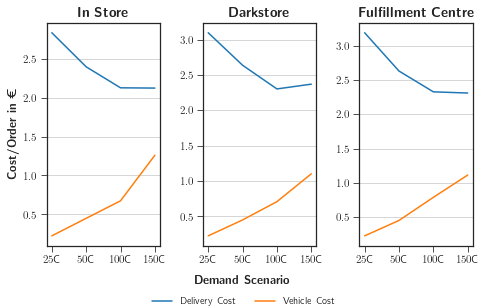

In [380]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=set_size(500))

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")


ax1.plot(labels, IS["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, IS["Fixed_V"], label="Vehicle Cost")


ax2.plot(labels, D["Trans_per_order"])
ax2.plot(labels, D["Fixed_V"])



ax3.plot(labels, FC["Trans_per_order"])
ax3.plot(labels, FC["Fixed_V"])


ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
#fig.savefig("result_graph/demand_scenario_cost_structure.svg", format = "svg")

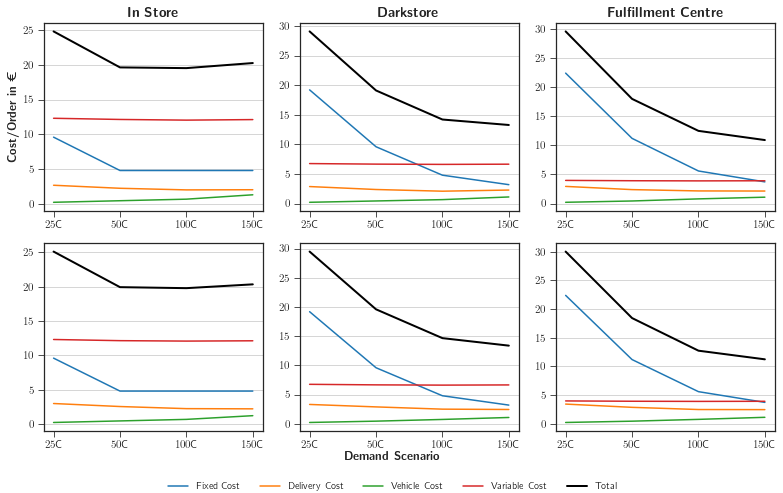

In [389]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(2,3, figsize=set_size(800))

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Cost/Order in €")

ax1.plot(labels, alb_IS_scen["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(labels, alb_IS_scen["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, alb_IS_scen["Fixed_V"], label="Vehicle Cost")
ax1.plot(labels, alb_IS_scen["Var_per_order"], label="Variable Cost")
ax1.plot(labels, alb_IS_scen["Total"], color = "black", lw=2, label="Total")

ax2.plot(labels, alb_D_scen["FixedDC_per_order"])
ax2.plot(labels, alb_D_scen["Trans_per_order"])
ax2.plot(labels, alb_D_scen["Fixed_V"])
ax2.plot(labels, alb_D_scen["Var_per_order"])
ax2.plot(labels, alb_D_scen["Total"], color = "black", lw=2, label="Total")

ax3.plot(labels, alb_F_scen["FixedDC_per_order"])
ax3.plot(labels, alb_F_scen["Trans_per_order"])
ax3.plot(labels, alb_F_scen["Fixed_V"])
ax3.plot(labels, alb_F_scen["Var_per_order"])
ax3.plot(labels, alb_F_scen["Total"], color = "black", lw=2, label="Total")



ax4.plot(labels, wue_IS_scen["FixedDC_per_order"], label="Fixed Cost")
ax4.plot(labels, wue_IS_scen["Trans_per_order"], label="Delivery Cost")
ax4.plot(labels, wue_IS_scen["Fixed_V"], label="Vehicle Cost")
ax4.plot(labels, wue_IS_scen["Var_per_order"], label="Variable Cost")
ax4.plot(labels, wue_IS_scen["Total"], color = "black", lw=2, label="Total")

ax5.plot(labels, wue_D_scen["FixedDC_per_order"])
ax5.plot(labels, wue_D_scen["Trans_per_order"])
ax5.plot(labels, wue_D_scen["Fixed_V"])
ax5.plot(labels, wue_D_scen["Var_per_order"])
ax5.plot(labels, wue_D_scen["Total"], color = "black", lw=2, label="Total")

ax6.plot(labels, wue_F_scen["FixedDC_per_order"])
ax6.plot(labels, wue_F_scen["Trans_per_order"])
ax6.plot(labels, wue_F_scen["Fixed_V"])
ax6.plot(labels, wue_F_scen["Var_per_order"])
ax6.plot(labels, wue_F_scen["Total"], color = "black", lw=2, label="Total")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
ax4.yaxis.grid(True)
ax5.yaxis.grid(True)
ax6.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
#fig.savefig("result_graph/demand_scenario_cost_structure.svg", format = "svg")

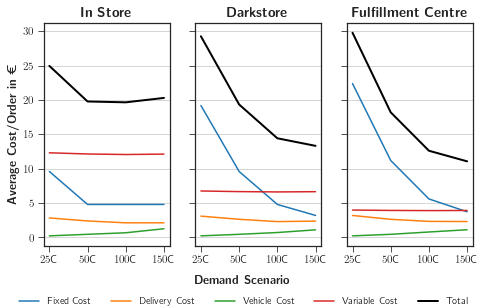

In [392]:
plt.style.use("seaborn-ticks")

xticks = [1,2,3,4]
labels = ["$25$C","$50$C", "$100$C", "$150$C"]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=set_size(500), sharey=True)

fig.supxlabel("\\textbf{Demand Scenario}", y = 0.05, fontsize=12)
ax1.set_title("\\textbf{In Store}", fontsize=14)
ax2.set_title("\\textbf{Darkstore}", fontsize=14)
ax3.set_title("\\textbf{Fulfillment Centre}", fontsize=14)
ax1.set_ylabel("\\textbf{Average Cost/Order in €")

ax1.plot(labels, IS["FixedDC_per_order"], label="Fixed Cost")
ax1.plot(labels, IS["Trans_per_order"], label="Delivery Cost")
ax1.plot(labels, IS["Fixed_V"], label="Vehicle Cost")
ax1.plot(labels, IS["Var_per_order"], label="Variable Cost")
ax1.plot(labels, IS["Total"], color = "black", lw=2, label="Total")

ax2.plot(labels, D["FixedDC_per_order"])
ax2.plot(labels, D["Trans_per_order"])
ax2.plot(labels, D["Fixed_V"])
ax2.plot(labels, D["Var_per_order"])
ax2.plot(labels, D["Total"], color = "black", lw=2, label="Total")

ax3.plot(labels, FC["FixedDC_per_order"])
ax3.plot(labels, FC["Trans_per_order"])
ax3.plot(labels, FC["Fixed_V"])
ax3.plot(labels, FC["Var_per_order"])
ax3.plot(labels, FC["Total"], color = "black", lw=2, label="Total")

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax3.yaxis.grid(True)
#loc =plticker.MultipleLocator(base=2.5)
#ax1.yaxis.set_major_locator(loc)
#ax2.yaxis.set_major_locator(loc)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', frameon=False,
           fancybox=False, ncol=5, borderpad=0.1, labelspacing = 0.2, borderaxespad=0.1)


fig.tight_layout()
plt.show()
fig.savefig("result_graph/demand_scenario_cost_structure1.svg", format = "svg")